<a href="https://colab.research.google.com/github/rdnsa/RandomForestGenderAnalysis/blob/main/random_forest_gender_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Informasi Umum Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB
None

Statistik Deskriptif:
         long_hair  forehead_width_cm  forehead_height_cm    nose_wide  \
count  5001.000000        5001.000000         5001.000000  5001.000000   
mean      0.869626          13.181484            5.946311     0.493901

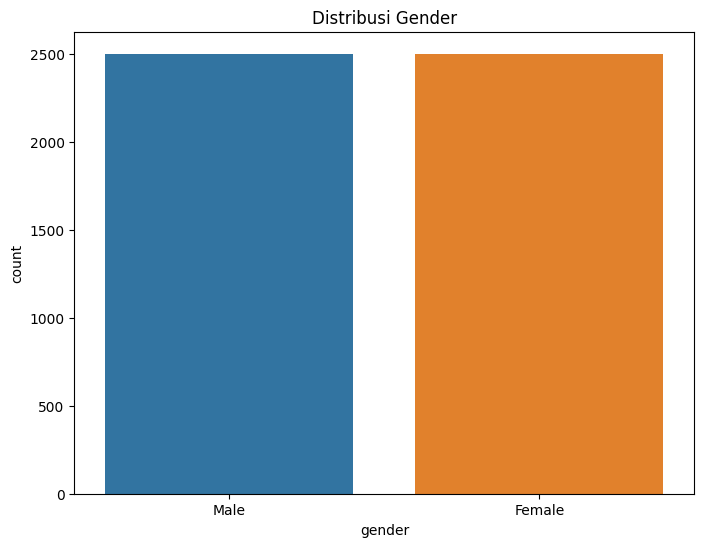

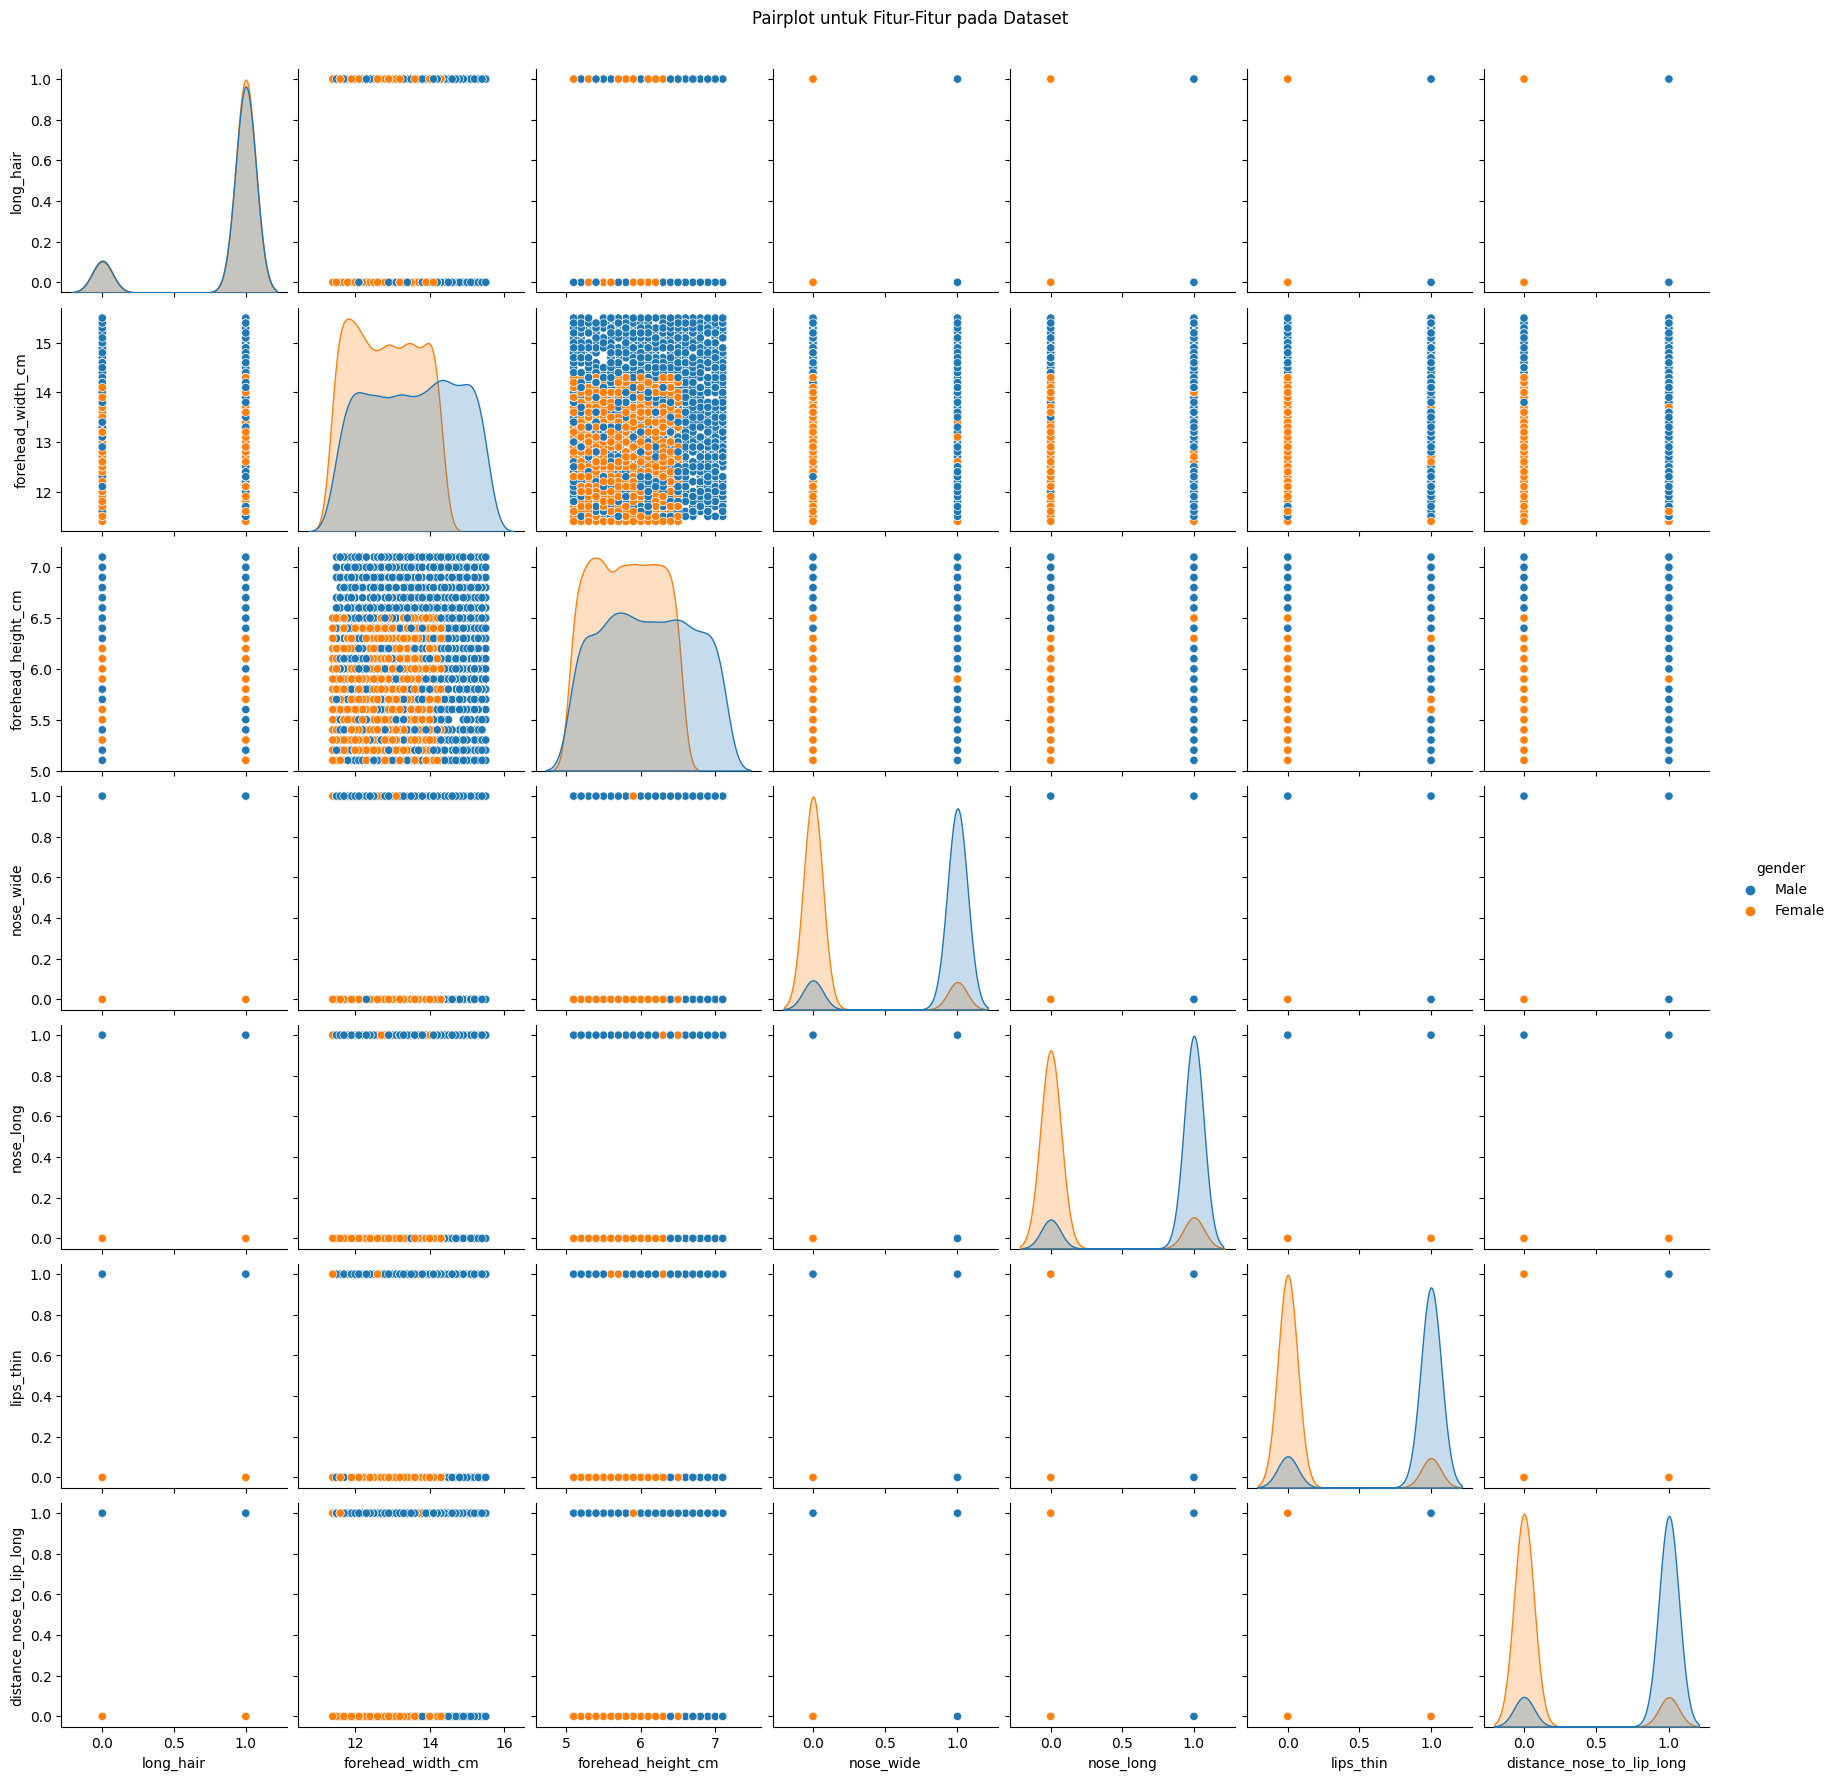

<ipython-input-1-0450f8f30239>:35: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)


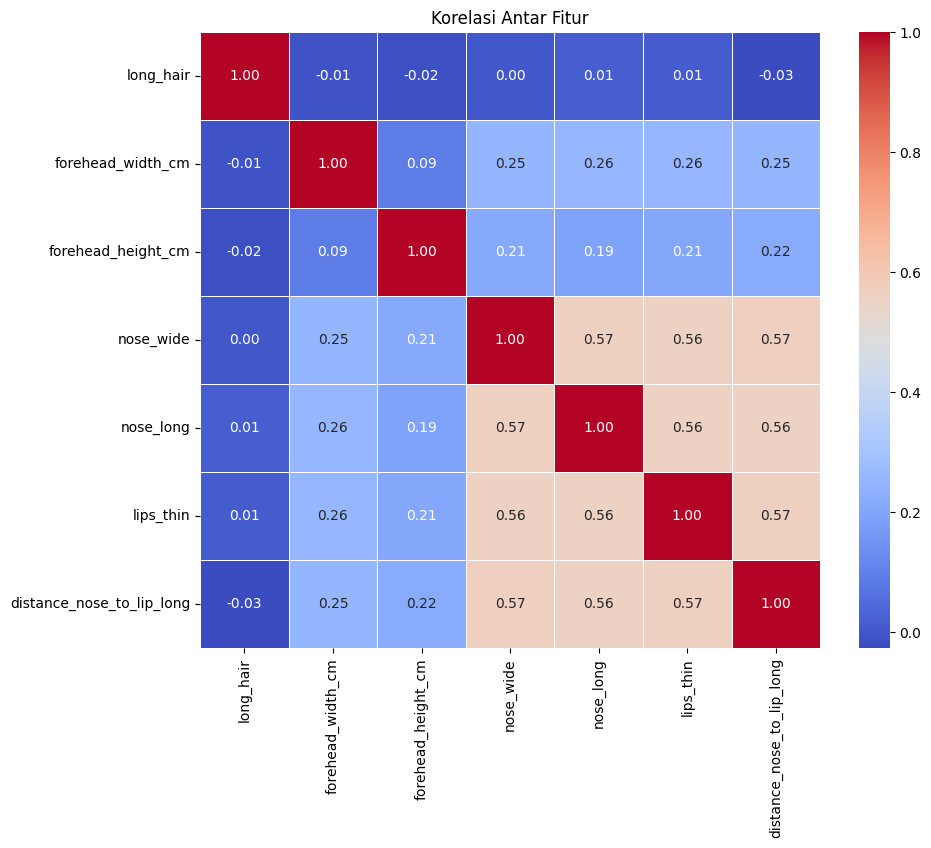

In [ ]:
# Instal library yang dibutuhkan jika belum terinstal
!pip install pandas matplotlib seaborn

# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
# Gantilah 'path_to_your_dataset.csv' dengan path sesuai dataset Anda
path_to_dataset = '/content/gender_classification_v7.csv'
df = pd.read_csv(path_to_dataset)

# Tampilkan informasi umum tentang dataset
print("Informasi Umum Dataset:")
print(df.info())

# Statistik Deskriptif
print("\nStatistik Deskriptif:")
print(df.describe())

# Distribusi Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=df)
plt.title('Distribusi Gender')
plt.show()

# Pairplot untuk melihat hubungan antar fitur
sns.pairplot(df, hue='gender', diag_kind='kde')
plt.suptitle('Pairplot untuk Fitur-Fitur pada Dataset', y=1.02)
plt.show()

# Korelasi antar fitur
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasi Antar Fitur')
plt.show()


In [ ]:
# Instal library yang dibutuhkan jika belum terinstal
!pip install pandas matplotlib seaborn scikit-learn graphviz

# Import library
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report
import graphviz

# Load dataset
path_to_dataset = '/content/gender_classification_v7.csv'
df = pd.read_csv(path_to_dataset)

# Pisahkan fitur dan label
X = df[['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide', 'nose_long', 'lips_thin', 'distance_nose_to_lip_long']]
y = df['gender']

# Pisahkan data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Latih model
rf_model.fit(X_train, y_train)

# Prediksi menggunakan data pengujian
y_pred = rf_model.predict(X_test)

# Evaluasi kinerja model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualisasi salah satu decision tree dari Random Forest
# Pilih salah satu tree (misalnya, tree pertama)
tree_visualization = tree.export_graphviz(rf_model.estimators_[0], out_file=None,
                                         feature_names=X.columns, class_names=['female', 'male'],
                                         filled=True, rounded=True, special_characters=True)

# Tampilkan visualisasi tree
graph = graphviz.Source(tree_visualization)
graph.render("random_forest_tree", format="png", cleanup=True)
graph.view("random_forest_tree")


Accuracy: 0.9590409590409591
Classification Report:
               precision    recall  f1-score   support

      Female       0.96      0.96      0.96       502
        Male       0.96      0.96      0.96       499

    accuracy                           0.96      1001
   macro avg       0.96      0.96      0.96      1001
weighted avg       0.96      0.96      0.96      1001



'random_forest_tree.pdf'

In [ ]:
!pip install dtreeviz


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 646.7 kB/s eta 0:00:00


In [ ]:
# Instal library yang dibutuhkan jika belum terinstal
!pip install pandas matplotlib seaborn scikit-learn dtreeviz

# Import library
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from dtreeviz.trees import dtreeviz

# Load dataset
path_to_dataset = '/content/gender_classification_v7.csv'
df = pd.read_csv(path_to_dataset)

# Pisahkan fitur dan label
X = df[['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide', 'nose_long', 'lips_thin', 'distance_nose_to_lip_long']]
y = df['gender']

# Pisahkan data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# Latih model
dt_model.fit(X_train, y_train)

# Prediksi menggunakan data pengujian
y_pred = dt_model.predict(X_test)

# Evaluasi kinerja model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualisasi pohon keputusan
viz = dtreeviz(dt_model, X_train, y_train,
               feature_names=X.columns,
               target_name='gender',
               class_names=['female', 'male'])
viz.view()


ImportError: ignored

Accuracy: 0.9530469530469531
Classification Report:
               precision    recall  f1-score   support

      Female       0.95      0.96      0.95       502
        Male       0.96      0.95      0.95       499

    accuracy                           0.95      1001
   macro avg       0.95      0.95      0.95      1001
weighted avg       0.95      0.95      0.95      1001



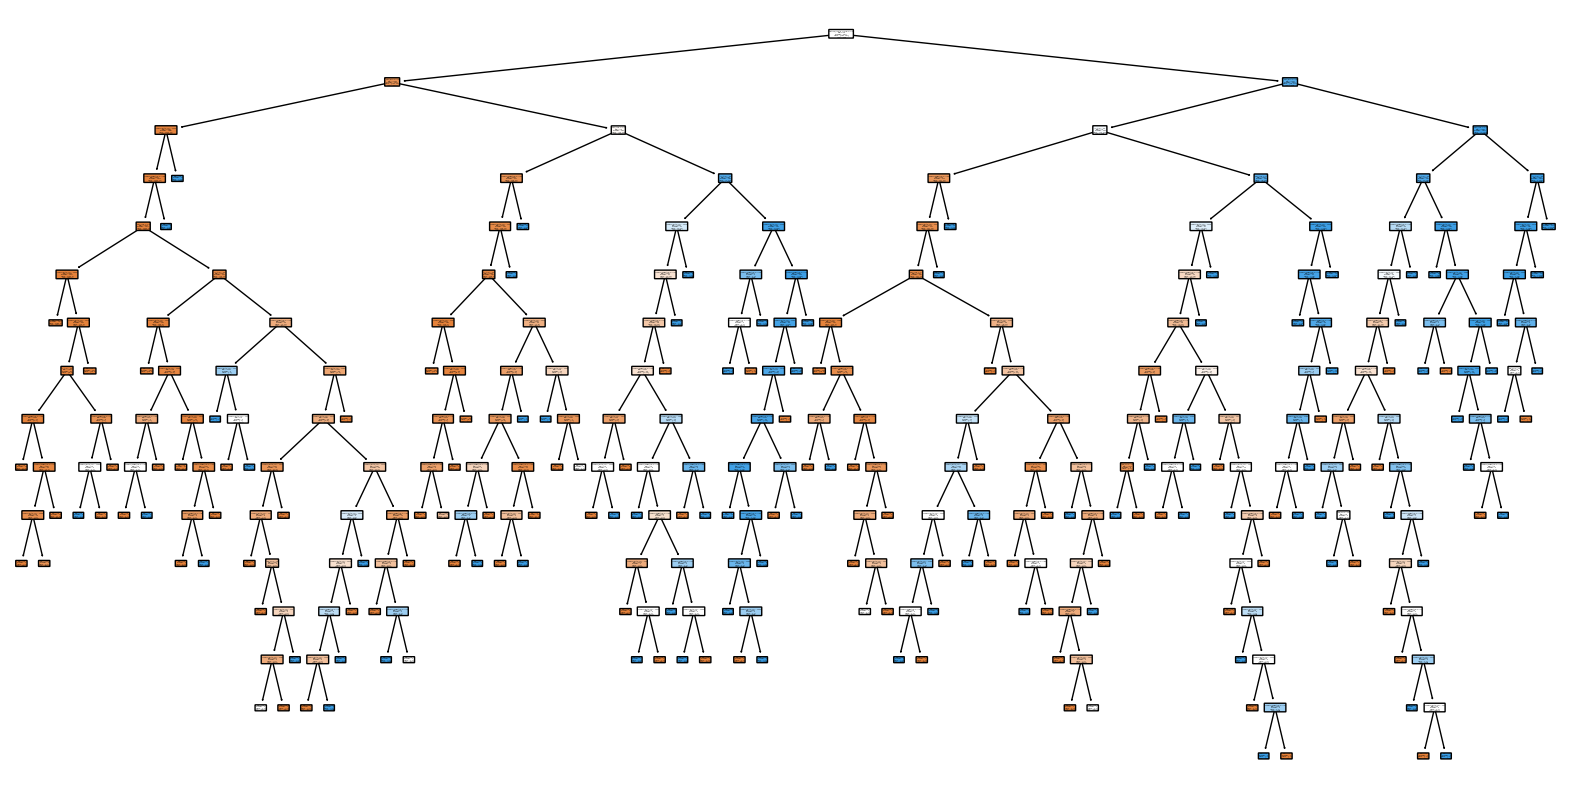

In [ ]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
path_to_dataset = '/content/gender_classification_v7.csv'
df = pd.read_csv(path_to_dataset)

# Pisahkan fitur dan label
X = df[['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide', 'nose_long', 'lips_thin', 'distance_nose_to_lip_long']]
y = df['gender']

# Pisahkan data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# Latih model
dt_model.fit(X_train, y_train)

# Prediksi menggunakan data pengujian
y_pred = dt_model.predict(X_test)

# Evaluasi kinerja model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualisasi pohon keputusan
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, class_names=['female', 'male'], filled=True, rounded=True)
plt.show()

Accuracy: 0.9530469530469531
Classification Report:
               precision    recall  f1-score   support

      Female       0.95      0.96      0.95       502
        Male       0.96      0.95      0.95       499

    accuracy                           0.95      1001
   macro avg       0.95      0.95      0.95      1001
weighted avg       0.95      0.95      0.95      1001



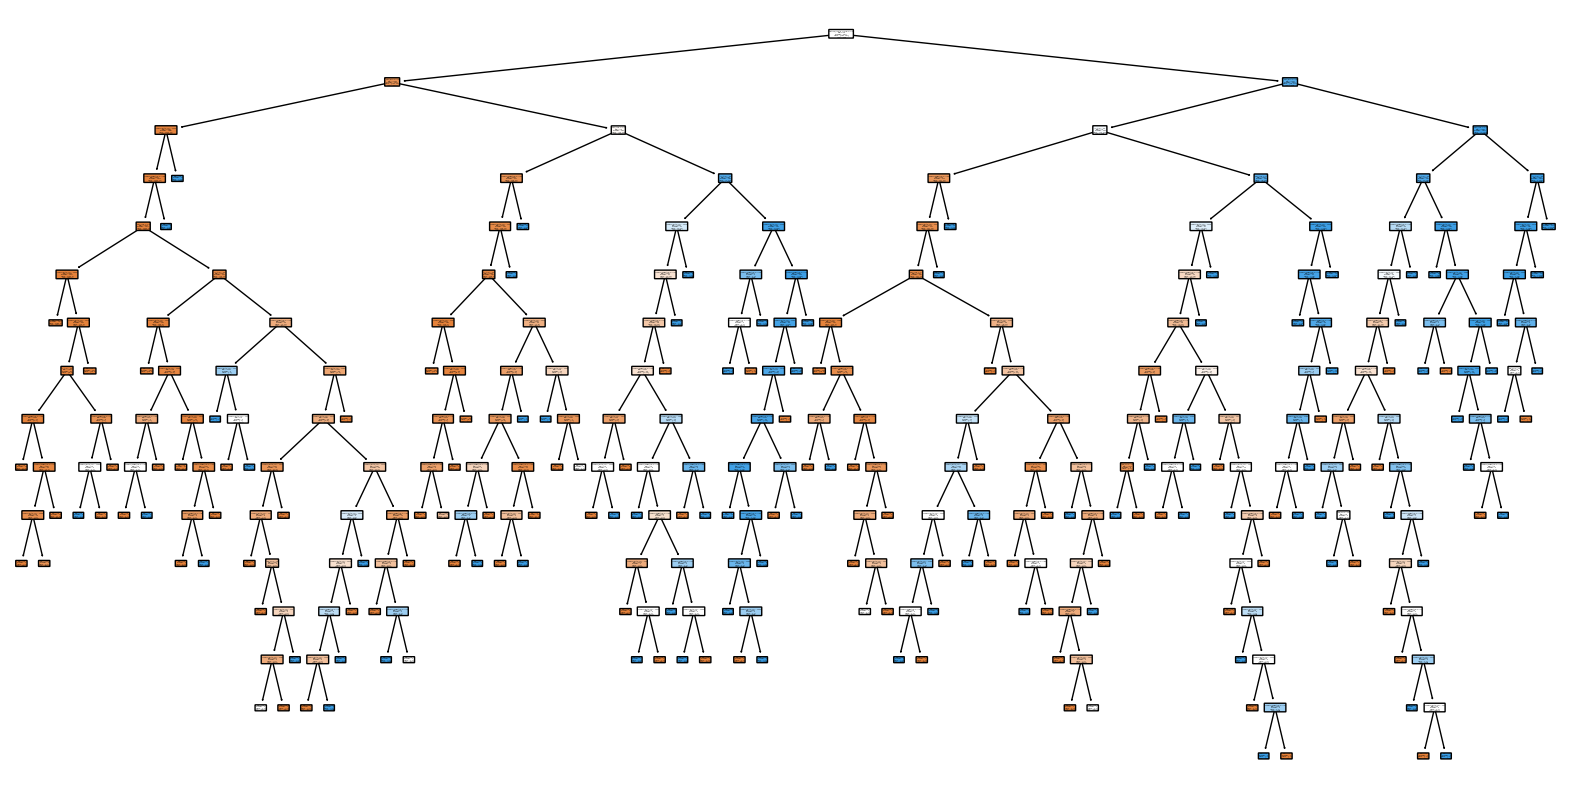

In [ ]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
path_to_dataset = '/content/gender_classification_v7.csv'
df = pd.read_csv(path_to_dataset)

# Pisahkan fitur dan label
X = df[['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide', 'nose_long', 'lips_thin', 'distance_nose_to_lip_long']]
y = df['gender']

# Pisahkan data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# Latih model
dt_model.fit(X_train, y_train)

# Prediksi menggunakan data pengujian
y_pred = dt_model.predict(X_test)

# Evaluasi kinerja model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualisasi pohon keputusan dan simpan sebagai PDF
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=['female', 'male'], filled=True, rounded=True)
plt.savefig("/content/decision_tree_visualization.pdf", format='pdf', bbox_inches='tight')
plt.show()
